In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class environment(object):
    def __init__(self, density, gravity):
        self.density = density
        self.gravity = gravity

class ball(object):
    def __init__(self, diameter, density, position, speed, angle):
        self.diameter = diameter
        self.density = density
        self.position = position
        self.vx = speed * math.cos(angle)
        self.vy = speed * math.sin(angle)
        self.mass = (4/3) * math.pi * (diameter/2)**3 * density
        self.time = 0
    
    def angle(self):
        return math.atan2(self.vy, self.vx)
    
    def speed(self):
        return (self.vx**2 + self.vy**2)**(1/2)
    
    def moveStep(self, medium, dt):
        positionOld = self.position
        speedOld = self.speed()
        angleOld = self.angle()
        vxOld = self.vx
        vyOld = self.vy
        xForceOld = -math.cos(angleOld) * ((1/4) * medium.density * (math.pi) * (self.diameter/2)**2  * speedOld**2)
        yForceOld = -math.sin(angleOld) * ((1/4) * medium.density * (math.pi) * (self.diameter/2)**2  * speedOld**2) - self.mass * medium.gravity
        self.position = [positionOld[0] + vxOld * dt, positionOld[1] + vyOld * dt]
        self.vx = vxOld + (xForceOld/self.mass) * dt
        self.vy = vyOld + (yForceOld/self.mass) * dt
        self.time = self.time + dt

In [3]:
def throw(thing, material, dt, maxT = 100000, minY = 0, maxY = 1000):
    timeLocal = np.array([thing.time]) 
    positionLocal = np.array([thing.position])
    energyLocal = np.array([thing.mass*(0.5 * thing.speed()**2 + material.gravity * thing.position[1])])
    while thing.position[1] <= maxY and thing.position[1] >= minY and thing.time <= maxT:
        thing.moveStep(material, dt)
        timeLocal = np.append(timeLocal, thing.time)
        positionLocal = np.append(positionLocal, [thing.position], axis=0)
        energyLocal = np.append(energyLocal, thing.mass*(0.5 * thing.speed()**2 + material.gravity * thing.position[1]))
    return timeLocal, positionLocal, energyLocal

In [4]:
vaccuum = environment(density = 0, gravity= 9.8)
air = environment(density = 1.2, gravity= 9.8)
###
steel1 = ball(.02, 8000, [0,0], 100, np.pi/6)
steel2 = ball(.02, 8000, [0,0], 100, np.pi/6)
balsa = ball(.02, 160, [0,0], 100, np.pi/6)

In [5]:
times1, throw1, energies1 = throw(steel1, vaccuum, .001)
times2, throw2, energies2 = throw(steel2, air, .001)
times3, throw3, energies3 = throw(balsa, air, .001)

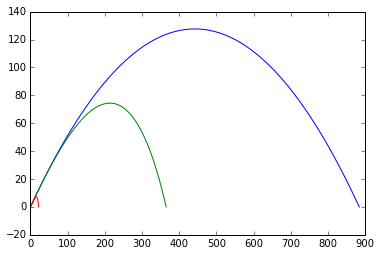

In [6]:
plt.plot(throw1[:,0], throw1[:,1], throw2[:,0], throw2[:,1], throw3[:,0], throw3[:,1])

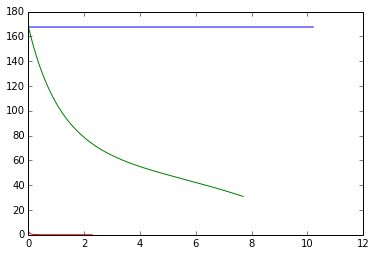

In [7]:
plt.plot(times1, energies1, times2, energies2, times3, energies3)

In [8]:
def maxDistance(density, diameter, speed, medium, dtheta):
    theta = 0
    dataArray = np.array([[theta,0]])
    while theta <= math.pi/2:
        theta = theta + dtheta
        testBall = ball(diameter, density, [0,0], speed, theta)
        throw(testBall, medium, .001)
        dataArray = np.append(dataArray, [[theta, testBall.position[0]]], axis=0)
    for i in range(len(dataArray)):
        if i == 0:
            maxTheta, maxDistance = dataArray[i]
        else:
            if dataArray[i, 1] > maxDistance:
                maxTheta, maxDistance = dataArray[i]
    return maxTheta, maxDistance

In [9]:
balsaAngle, balsaDistance = maxDistance(160, .02, 100, air, .01)
steelAngle, steelDistance = maxDistance(8000, .02, 100, air, .01)
print("The maximum angle of the balsa wood is", balsaAngle, "rads.")
print("The maximum angle of the steel is", steelAngle, 'rads.')

The maximum angle of the balsa wood is 0.42 rads.
The maximum angle of the steel is 0.66 rads.
